## Name: RISHAB JAIN
## Company : Code Clause
## Data Science Internship


## Task1:Fake News Prediction.


In [22]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline


In [2]:
df_True=pd.read_csv('True.csv')

df_True.head(5)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### Lets vizualise the count sub categories in Subject Columns.

<AxesSubplot:>

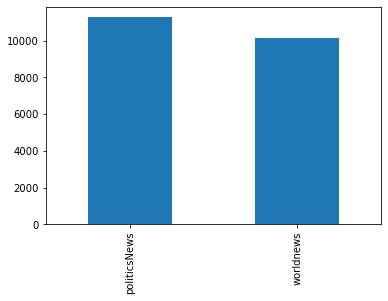

In [3]:
df_True['subject'].value_counts().plot(kind='bar')

In [4]:
df_Fake=pd.read_csv('Fake.csv')
df_Fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


### Lets vizualise the count sub categories in Subject Columns.

<AxesSubplot:>

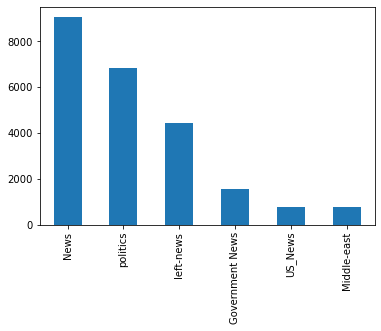

In [5]:
df_Fake['subject'].value_counts().plot(kind='bar')

### Lets Create target Variable and merge the data

In [6]:
df_Fake['Target']='Fake'
df_True['Target']='Real'
df=pd.concat([df_True,df_Fake])

df.head(5)

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


### Lets see the ratio of Fake and Real news present in the final dataset

In [7]:
df['Target'].value_counts()/len(df)*100

Fake    52.298543
Real    47.701457
Name: Target, dtype: float64

### Lets Drop irrelevant columns.

In [8]:
df=df.drop(['title','subject','date'],axis=1)

In [9]:
df.head(5)

,text,Target
0,WASHINGTON (Reuters) - The head of a conservat...,Real
1,WASHINGTON (Reuters) - Transgender people will...,Real
2,WASHINGTON (Reuters) - The special counsel inv...,Real
3,WASHINGTON (Reuters) - Trump campaign adviser ...,Real
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,Real


### Add the new column "Target_num" which gives a unique number to each of these Targets

In [11]:
 df['Target_num'] = df['Target'].map({'Fake' : 0, 'Real':1})

df.head(5)

,text,Target,Target_num
0,WASHINGTON (Reuters) - The head of a conservat...,Real,1
1,WASHINGTON (Reuters) - Transgender people will...,Real,1
2,WASHINGTON (Reuters) - The special counsel inv...,Real,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,Real,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,Real,1


### Modelling

In [15]:
from sklearn.model_selection import train_test_split
#Do the 'train-test' splitting with test size of 20% with random state of 11 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split( df.text,df.Target_num,test_size=0.2,
                                                    random_state=11,stratify=df.Target_num)

In [16]:
#print the shapes of X_train and X_test
print('Shape of X_train :', X_train.shape )
print('Shape of X_test :',X_test.shape)

Shape of X_train : (35918,)
Shape of X_test : (8980,)


#### KNN - euclidean

In [23]:
model_1 =Pipeline([('Vectorizer',CountVectorizer()),
               ('kneighbors',KNeighborsClassifier(n_neighbors=10,metric='euclidean'))])

model_1.fit(X_train,y_train)
y_pred = model_1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4696
           1       0.88      0.89      0.89      4284

    accuracy                           0.89      8980
   macro avg       0.89      0.89      0.89      8980
weighted avg       0.89      0.89      0.89      8980



#### KNN - Coisine

In [25]:
model_2 =Pipeline([('Vectorizer',CountVectorizer(ngram_range=(1,3))),
               ('kneighbors',KNeighborsClassifier(n_neighbors=10,metric='cosine'))])

model_2.fit(X_train,y_train)
y_pred = model_2.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.98      0.77      4696
           1       0.95      0.40      0.56      4284

    accuracy                           0.70      8980
   macro avg       0.79      0.69      0.67      8980
weighted avg       0.79      0.70      0.67      8980



#### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

model_3=Pipeline([('Vectorizer',CountVectorizer(ngram_range=(3,3))),
                  ('random_forest',RandomForestClassifier())])

model_3.fit(X_train,y_train)
y_pred = model_3.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4696
           1       0.98      0.97      0.97      4284

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



#### Naive bayes(Multinomial)

In [30]:
from sklearn.naive_bayes import MultinomialNB

model_4 =Pipeline([('Vectorizer',CountVectorizer(ngram_range=(1,2))),
                   ('multi_nb',MultinomialNB(alpha=0.75))])
model_4.fit(X_train,y_train)
y_pred = model_4.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4696
           1       0.97      0.98      0.97      4284

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



### Confusion Matrix of the best model

In [32]:
from sklearn.metrics import confusion_matrix

Text(69.0, 0.5, 'Actual')

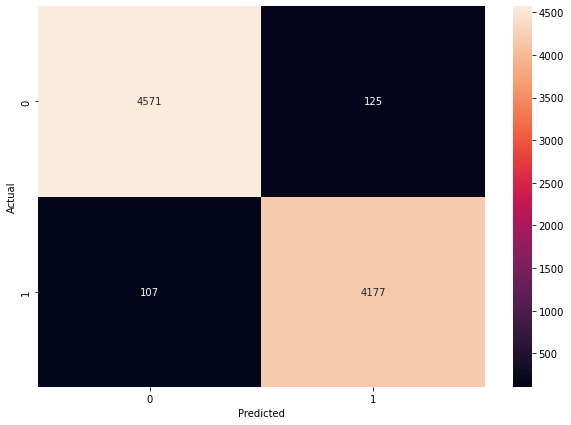

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')